In [100]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [101]:
# Import Important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Read Data
df=pd.read_csv("E:/Upgrad/Assignment_file/ML/day.csv")

## 1. Data understanding

In [103]:
# Data sanity check
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [104]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [105]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [106]:
#Check null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [107]:
# instant looks index column which will not contribute in analysis, simply drop it
df.drop(['instant'],axis=1,inplace=True)

In [62]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [108]:
#dteday does not looks much impressive as we have smilar column available like yr,mnth,weekday etc. drop it straight away
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [109]:
#casual & registered (cnt) will make our analysis more complicated, so better remove them and cnt is our target variable 
df.drop(['casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [110]:
# lets check another sanity point, is datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [111]:
# Looking into data, we can say season,yr,mnth,holiday,weekday,workingday,weathersit  are categorical variables, so better replace with more meaningful name
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [112]:
df.head(30)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.181250,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.686950,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.470250,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.606100,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.463500,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,Clear_Few Clouds,8.378268,11.660450,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist_cloudy,8.057402,10.441950,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist_cloudy,6.765000,8.112700,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,Clear_Few Clouds,5.671653,5.808750,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,Clear_Few Clouds,6.184153,7.544400,48.2917,14.958889,1321


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [114]:
#Freezing datatypes of numerical columns to appropriate types
df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


## 2. Cultivating EDA on the data

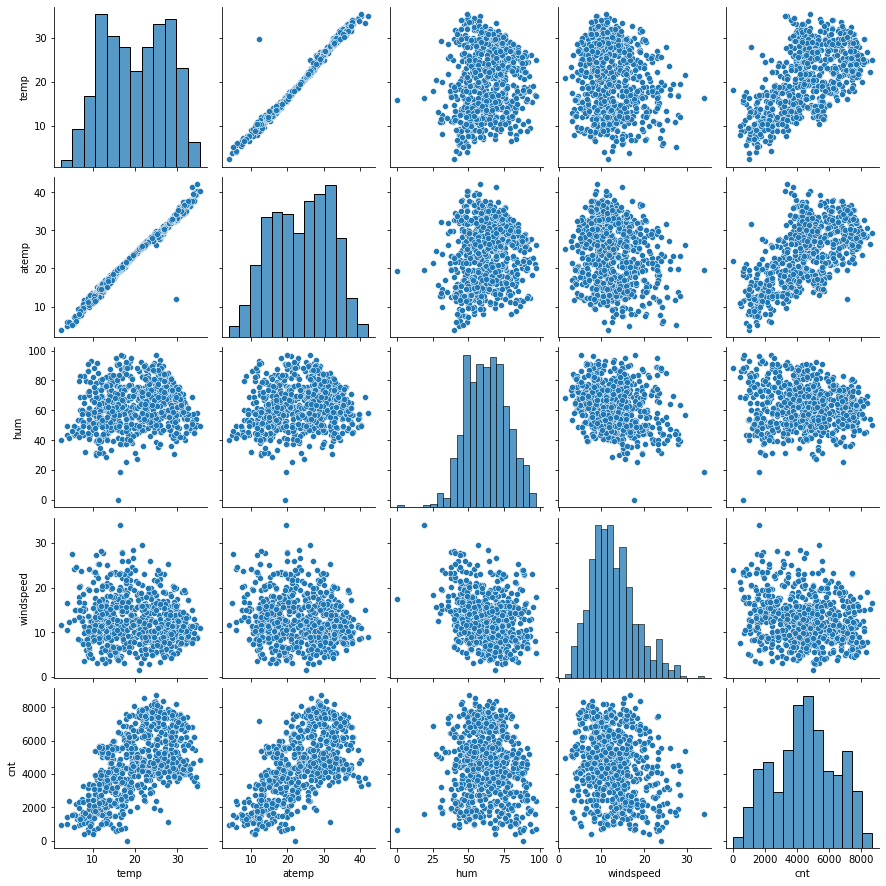

In [115]:
# Checking correlation in 5 numerical variable
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

## temp and atemp are highly correlated in above pair plot

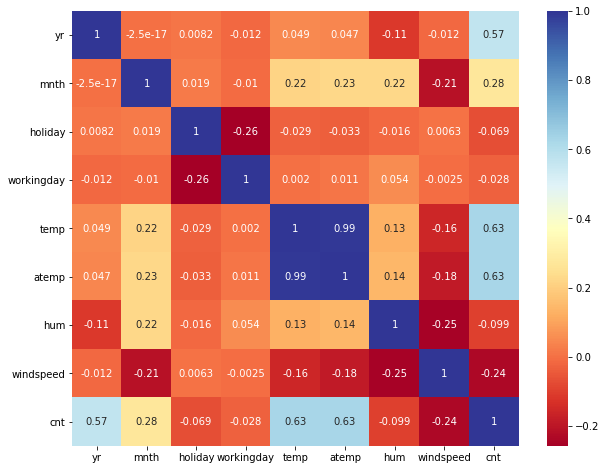

In [116]:
#let check the correlation
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap="RdYlBu")
plt.show()

In [118]:
#correlation between temp and atemp ~1 better drop it

df.drop(['temp'],axis=1,inplace=True)
df.head()

KeyError: "['temp'] not found in axis"

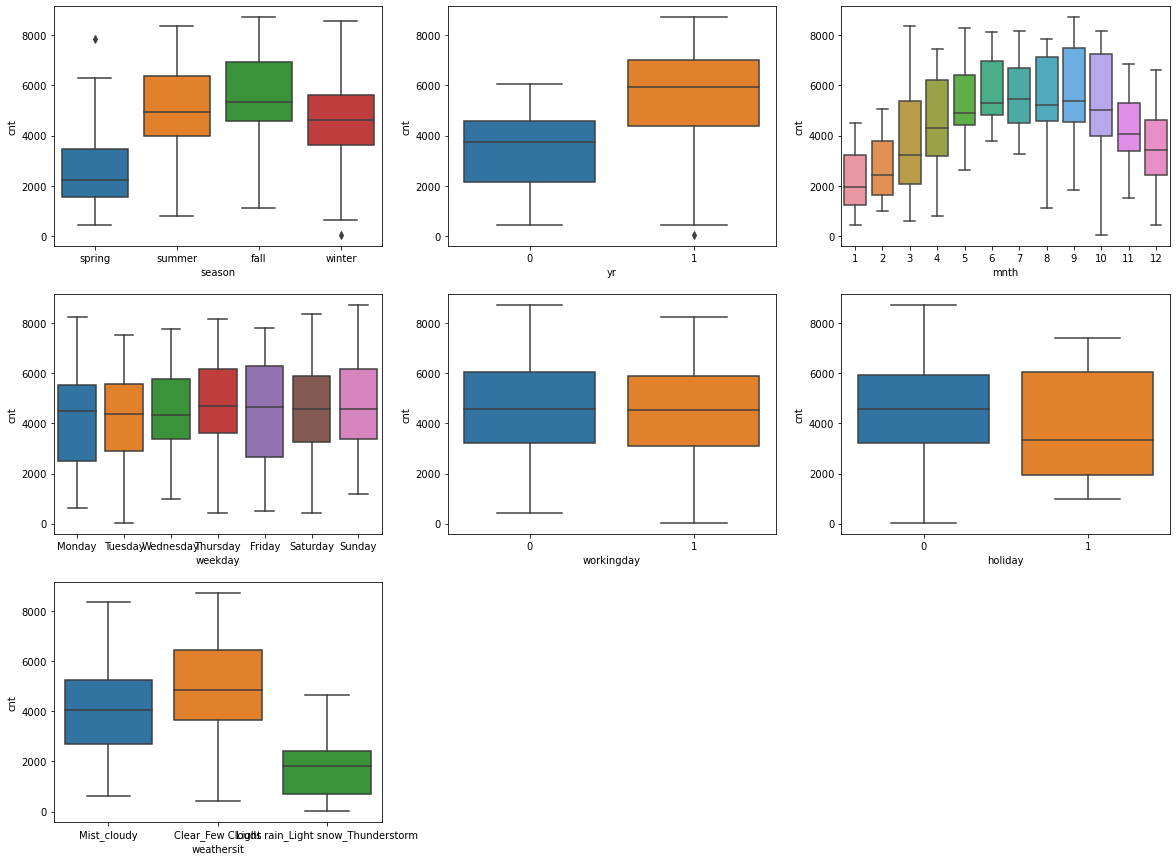

In [119]:

#Visualising categorical Variables to understand data better
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df) 
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

## 3. Creating the dummy variable

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


In [121]:
# Converting into object
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [122]:
df['season']

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [123]:
df['weathersit']

0           Mist_cloudy
1           Mist_cloudy
2      Clear_Few Clouds
3      Clear_Few Clouds
4      Clear_Few Clouds
             ...       
725         Mist_cloudy
726         Mist_cloudy
727         Mist_cloudy
728    Clear_Few Clouds
729         Mist_cloudy
Name: weathersit, Length: 730, dtype: object

In [124]:
df['weekday']

0         Monday
1        Tuesday
2      Wednesday
3       Thursday
4         Friday
         ...    
725       Friday
726     Saturday
727       Sunday
728       Monday
729      Tuesday
Name: weekday, Length: 730, dtype: object

In [125]:
df['mnth']

0       1
1       1
2       1
3       1
4       1
       ..
725    12
726    12
727    12
728    12
729    12
Name: mnth, Length: 730, dtype: object

In [126]:
# convert categorical variable into dummy/indicator variables 
SeasonCondition=pd.get_dummies(df['season'],drop_first=True)
WeatherCondition=pd.get_dummies(df['weathersit'],drop_first=True)
DayOfWeek=pd.get_dummies(df['weekday'],drop_first=True)
MonthName=pd.get_dummies(df['mnth'],drop_first=True)

In [127]:
SeasonCondition

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [128]:
WeatherCondition

,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [129]:
DayOfWeek

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [131]:
MonthName

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [132]:
df=pd.concat([df,SeasonCondition],axis=1)
df=pd.concat([df,WeatherCondition],axis=1)
df=pd.concat([df,DayOfWeek],axis=1)
df=pd.concat([df,MonthName],axis=1)

In [133]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,3,4,5,6,7,8,9,10,11,12
0,spring,0,1,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,1,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,1,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [134]:
#Dropping the older variable season, weathersit,weekday,mnth
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Split into training and test data

In [135]:
# Import sklearn library needed for data split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [136]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [137]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [138]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [139]:
# Numberical variable scalling function
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [140]:
NumVar=['atemp','hum','windspeed','cnt']
df_train[NumVar] = scaler.fit_transform(df_train[NumVar])

In [141]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [142]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
# X and Y creating
y_train = df_train.pop('cnt')
X_train = df_train

In [144]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [145]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Importing RFE library

In [146]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [147]:
# RFE method for feature selection, and lets take 15 variable

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [148]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 12)]

In [149]:
column = X_train.columns[rfe.support_]
column

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [150]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [151]:
X_train_rfe = X_train[column]

In [152]:
# Model using Statsmodel , import library and add constant

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [153]:
#OLS best fit
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [154]:
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.06e-186
Time:                        19:15:52   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2995      0.034      8.909      0.000       0.233       0.366
yr                                     0.2320      0.008     28.268      0.000       0.216       0.248
holiday                               -0.0845      0.026     -3.266      0.001      -0.135      -0.034
atemp                                  0.4597      0.033     13.757      0.000       0.394       0.525
hum                                   -0.1599      0.038     -4.156      0.000      -0.236      -0.084
windspeed                             -0.1613      0.026     -6.170      0.000      -0.213      -0.110
spring                                -0.0757      0.019     -4.061      0.000      -0.112      -0.039
winter                                 0.1024      0.016      6.301      0.000       0.070       0.134
Light rain_Light snow_Thunderstorm    -0.2359      0.027     -8.833      0.000      -0.288      -0.183
Mist_cloudy                           -0.0568      0.011     -5.347      0.000      -0.078      -0.036
3                                      0.0585      0.015      3.852      0.000       0.029       0.088
4                                      0.0591      0.020      2.948      0.003       0.020       0.099
5                                      0.0922      0.019      4.906      0.000       0.055       0.129
6                                      0.0583      0.019      3.017      0.003       0.020       0.096
8                                      0.0608      0.018      3.362      0.001       0.025       0.096
9                                      0.1175      0.017      6.719      0.000       0.083       0.152
==============================================================================
Omnibus:                       60.719   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.007
Skew:                          -0.591   Prob(JB):                     6.62e-36
Kurtosis:                       5.496   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Identify VIF

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [157]:
X_train_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,4,5,6,8,9
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


In [162]:
# dropping variable "hum" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [163]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [164]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [165]:
lm1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.75e-183
Time:                        19:29:13   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2151      0.027      7.900      0.000       0.162       0.269
yr                                     0.2355      0.008     28.377      0.000       0.219       0.252
holiday                               -0.0854      0.026     -3.248      0.001      -0.137      -0.034
atemp                                  0.4298      0.033     12.960      0.000       0.365       0.495
windspeed                             -0.1332      0.026     -5.189      0.000      -0.184      -0.083
spring                                -0.0815      0.019     -4.310      0.000      -0.119      -0.044
winter                                 0.0911      0.016      5.597      0.000       0.059       0.123
Light rain_Light snow_Thunderstorm    -0.2799      0.025    -11.234      0.000      -0.329      -0.231
Mist_cloudy                           -0.0820      0.009     -9.252      0.000      -0.099      -0.065
3                                      0.0597      0.015      3.871      0.000       0.029       0.090
4                                      0.0597      0.020      2.930      0.004       0.020       0.100
5                                      0.0817      0.019      4.316      0.000       0.045       0.119
6                                      0.0628      0.020      3.199      0.001       0.024       0.101
8                                      0.0594      0.018      3.235      0.001       0.023       0.096
9                                      0.1118      0.018      6.311      0.000       0.077       0.147
==============================================================================
Omnibus:                       61.552   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.196
Skew:                          -0.618   Prob(JB):                     1.99e-34
Kurtosis:                       5.404   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.55
9,4,1.54


In [167]:
# dropping variable "atemp" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [168]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.90e-153
Time:                        19:31:11   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5082      0.018     28.983      0.000       0.474       0.543
yr                                     0.2479      0.010     26.013      0.000       0.229       0.267
holiday                               -0.0886      0.030     -2.916      0.004      -0.148      -0.029
windspeed                             -0.1645      0.030     -5.566      0.000      -0.223      -0.106
spring                                -0.2392      0.017    -14.308      0.000      -0.272      -0.206
winter                                -0.0080      0.017     -0.482      0.630      -0.041       0.025
Light rain_Light snow_Thunderstorm    -0.2896      0.029    -10.056      0.000      -0.346      -0.233
Mist_cloudy                           -0.0943      0.010     -9.257      0.000      -0.114      -0.074
3                                      0.0494      0.018      2.772      0.006       0.014       0.084
4                                     -0.0153      0.023     -0.676      0.499      -0.060       0.029
5                                      0.0671      0.022      3.072      0.002       0.024       0.110
6                                      0.0901      0.023      3.995      0.000       0.046       0.134
8                                      0.0929      0.021      4.418      0.000       0.052       0.134
9                                      0.1318      0.020      6.456      0.000       0.092       0.172
==============================================================================
Omnibus:                       35.107   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.924
Skew:                          -0.372   Prob(JB):                     7.28e-18
Kurtosis:                       4.777   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
6,Mist_cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [170]:
# dropping variable "windspeed" due to very high vif, dropping vif >2 and re-process the model
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [171]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          9.96e-148
Time:                        19:35:41   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4616      0.016     29.102      0.000       0.430       0.493
yr                                     0.2478      0.010     25.245      0.000       0.228       0.267
holiday                               -0.0918      0.031     -2.935      0.003      -0.153      -0.030
spring                                -0.2516      0.017    -14.740      0.000      -0.285      -0.218
winter                                -0.0093      0.017     -0.544      0.587      -0.043       0.024
Light rain_Light snow_Thunderstorm    -0.3052      0.030    -10.342      0.000      -0.363      -0.247
Mist_cloudy                           -0.0934      0.010     -8.907      0.000      -0.114      -0.073
3                                      0.0395      0.018      2.166      0.031       0.004       0.075
4                                     -0.0386      0.023     -1.691      0.092      -0.084       0.006
5                                      0.0638      0.022      2.838      0.005       0.020       0.108
6                                      0.0874      0.023      3.763      0.000       0.042       0.133
8                                      0.0961      0.022      4.439      0.000       0.054       0.139
9                                      0.1381      0.021      6.580      0.000       0.097       0.179
==============================================================================
Omnibus:                       43.939   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.742
Skew:                          -0.401   Prob(JB):                     3.67e-27
Kurtosis:                       5.255   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
# dropping variable "winter" due to very high p-value and re-process the model
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [173]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          9.28e-149
Time:                        19:40:39   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4552      0.011     42.608      0.000       0.434       0.476
yr                                     0.2478      0.010     25.263      0.000       0.228       0.267
holiday                               -0.0924      0.031     -2.956      0.003      -0.154      -0.031
spring                                -0.2457      0.013    -18.510      0.000      -0.272      -0.220
Light rain_Light snow_Thunderstorm    -0.3060      0.029    -10.389      0.000      -0.364      -0.248
Mist_cloudy                           -0.0938      0.010     -8.976      0.000      -0.114      -0.073
3                                      0.0423      0.017      2.421      0.016       0.008       0.077
4                                     -0.0321      0.019     -1.653      0.099      -0.070       0.006
5                                      0.0704      0.019      3.711      0.000       0.033       0.108
6                                      0.0938      0.020      4.703      0.000       0.055       0.133
8                                      0.1026      0.018      5.698      0.000       0.067       0.138
9                                      0.1426      0.019      7.422      0.000       0.105       0.180
==============================================================================
Omnibus:                       44.016   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.952
Skew:                          -0.402   Prob(JB):                     3.30e-27
Kurtosis:                       5.257   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
# dropping variable "4" due to very high p-value and re-process the model
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [175]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.76e-149
Time:                        19:41:52   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [177]:
# Now we can start adding variable to check if model improves, lets take Saturday

X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Saturday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [178]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.0
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.58e-148
Time:                        19:46:36   Log-Likelihood:                 407.23
No. Observations:                 510   AIC:                            -790.5
Df Residuals:                     498   BIC:                            -739.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4471      0.010     43.750      0.000       0.427       0.467
yr                                     0.2471      0.010     25.201      0.000       0.228       0.266
holiday                               -0.0908      0.031     -2.902      0.004      -0.152      -0.029
spring                                -0.2403      0.013    -18.689      0.000      -0.266      -0.215
Light rain_Light snow_Thunderstorm    -0.3054      0.029    -10.359      0.000      -0.363      -0.247
Mist_cloudy                           -0.0942      0.010     -8.995      0.000      -0.115      -0.074
3                                      0.0448      0.017      2.567      0.011       0.011       0.079
5                                      0.0763      0.019      4.102      0.000       0.040       0.113
6                                      0.1003      0.020      5.119      0.000       0.062       0.139
8                                      0.1082      0.018      6.137      0.000       0.074       0.143
9                                      0.1483      0.019      7.859      0.000       0.111       0.185
Saturday                               0.0188      0.015      1.289      0.198      -0.010       0.047
==============================================================================
Omnibus:                       39.981   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.143
Skew:                          -0.367   Prob(JB):                     5.42e-24
Kurtosis:                       5.122   Cond. No.                         8.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [179]:
#Saturday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [180]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.76e-149
Time:                        19:47:44   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [182]:
#lets take Sunday, check if model improves
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,1
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,1


In [185]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.28e-148
Time:                        19:52:01   Log-Likelihood:                 407.44
No. Observations:                 510   AIC:                            -790.9
Df Residuals:                     498   BIC:                            -740.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4469      0.010     43.770      0.000       0.427       0.467
yr                                     0.2467      0.010     25.170      0.000       0.227       0.266
holiday                               -0.0904      0.031     -2.891      0.004      -0.152      -0.029
spring                                -0.2403      0.013    -18.692      0.000      -0.266      -0.215
Light rain_Light snow_Thunderstorm    -0.3027      0.029    -10.275      0.000      -0.361      -0.245
Mist_cloudy                           -0.0948      0.010     -9.042      0.000      -0.115      -0.074
3                                      0.0446      0.017      2.559      0.011       0.010       0.079
5                                      0.0772      0.019      4.153      0.000       0.041       0.114
6                                      0.1002      0.020      5.112      0.000       0.062       0.139
8                                      0.1090      0.018      6.191      0.000       0.074       0.144
9                                      0.1486      0.019      7.879      0.000       0.112       0.186
Sunday                                 0.0205      0.014      1.441      0.150      -0.007       0.048
==============================================================================
Omnibus:                       42.684   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.984
Skew:                          -0.406   Prob(JB):                     4.82e-25
Kurtosis:                       5.147   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
#Sunday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)

In [192]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [191]:
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [193]:
#lets take workingday, check if model improves
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday
653,1,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0


In [194]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.76e-149
Time:                        19:59:36   Log-Likelihood:                 409.03
No. Observations:                 510   AIC:                            -794.1
Df Residuals:                     498   BIC:                            -743.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4691      0.013     35.343      0.000       0.443       0.495
yr                                     0.2467      0.010     25.254      0.000       0.228       0.266
holiday                               -0.1105      0.032     -3.426      0.001      -0.174      -0.047
spring                                -0.2408      0.013    -18.787      0.000      -0.266      -0.216
Light rain_Light snow_Thunderstorm    -0.3046      0.029    -10.376      0.000      -0.362      -0.247
Mist_cloudy                           -0.0957      0.010     -9.146      0.000      -0.116      -0.075
3                                      0.0442      0.017      2.544      0.011       0.010       0.078
5                                      0.0768      0.019      4.142      0.000       0.040       0.113
6                                      0.1002      0.020      5.132      0.000       0.062       0.139
8                                      0.1077      0.018      6.133      0.000       0.073       0.142
9                                      0.1476      0.019      7.847      0.000       0.111       0.185
workingday                            -0.0254      0.011     -2.278      0.023      -0.047      -0.003
==============================================================================
Omnibus:                       42.053   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.543
Skew:                          -0.405   Prob(JB):                     2.69e-24
Kurtosis:                       5.110   Cond. No.                         9.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
#workingday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [198]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.76e-149
Time:                        20:05:18   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [200]:
#lets take 2, check if model improves
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,2
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [201]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
lm11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.33e-148
Time:                        20:06:15   Log-Likelihood:                 406.46
No. Observations:                 510   AIC:                            -788.9
Df Residuals:                     498   BIC:                            -738.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4491      0.010     44.454      0.000       0.429       0.469
yr                                     0.2469      0.010     25.145      0.000       0.228       0.266
holiday                               -0.0918      0.031     -2.931      0.004      -0.153      -0.030
spring                                -0.2430      0.015    -16.440      0.000      -0.272      -0.214
Light rain_Light snow_Thunderstorm    -0.3042      0.030    -10.307      0.000      -0.362      -0.246
Mist_cloudy                           -0.0937      0.010     -8.940      0.000      -0.114      -0.073
3                                      0.0470      0.018      2.587      0.010       0.011       0.083
5                                      0.0768      0.019      4.122      0.000       0.040       0.113
6                                      0.1003      0.020      5.110      0.000       0.062       0.139
8                                      0.1092      0.018      6.188      0.000       0.075       0.144
9                                      0.1490      0.019      7.881      0.000       0.112       0.186
2                                      0.0091      0.023      0.392      0.695      -0.036       0.055
==============================================================================
Omnibus:                       40.935   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.694
Skew:                          -0.372   Prob(JB):                     5.57e-25
Kurtosis:                       5.169   Cond. No.                         8.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [202]:
#2 does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [203]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
lm12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.76e-149
Time:                        20:15:27   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [205]:
#lets take 7, check if model improves
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1
426,1,0,1,0,1,1,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0


In [206]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
lm13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.11e-153
Time:                        20:17:09   Log-Likelihood:                 418.78
No. Observations:                 510   AIC:                            -813.6
Df Residuals:                     498   BIC:                            -762.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4287      0.011     40.119      0.000       0.408       0.450
yr                                     0.2464      0.010     25.703      0.000       0.228       0.265
holiday                               -0.0810      0.031     -2.644      0.008      -0.141      -0.021
spring                                -0.2242      0.013    -17.278      0.000      -0.250      -0.199
Light rain_Light snow_Thunderstorm    -0.2951      0.029    -10.227      0.000      -0.352      -0.238
Mist_cloudy                           -0.0877      0.010     -8.510      0.000      -0.108      -0.067
3                                      0.0532      0.017      3.109      0.002       0.020       0.087
5                                      0.0947      0.019      5.106      0.000       0.058       0.131
6                                      0.1199      0.020      6.129      0.000       0.081       0.158
8                                      0.1277      0.018      7.247      0.000       0.093       0.162
9                                      0.1662      0.019      8.853      0.000       0.129       0.203
7                                      0.0964      0.019      4.982      0.000       0.058       0.134
==============================================================================
Omnibus:                       40.948   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.233
Skew:                          -0.337   Prob(JB):                     2.87e-27
Kurtosis:                       5.302   Cond. No.                         8.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.60
2,spring,1.40
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.13
9,9,1.11
6,5,1.10
10,7,1.07
7,6,1.06
1,holiday,1.03


In [ ]:
#model improved adding 7

In [208]:
#lets take 10, check if model improves
X_train_rfe[10]=X_train[10]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [209]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.06e-160
Time:                        20:19:01   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [211]:
#model improved adding 10

In [212]:
#lets take 11, check if model improves
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,11
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [213]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
lm15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.85e-159
Time:                        20:20:23   Log-Likelihood:                 437.99
No. Observations:                 510   AIC:                            -848.0
Df Residuals:                     496   BIC:                            -788.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3944      0.013     29.658      0.000       0.368       0.420
yr                                     0.2472      0.009     26.716      0.000       0.229       0.265
holiday                               -0.0780      0.030     -2.620      0.009      -0.136      -0.020
spring                                -0.1937      0.015    -13.300      0.000      -0.222      -0.165
Light rain_Light snow_Thunderstorm    -0.3159      0.028    -11.265      0.000      -0.371      -0.261
Mist_cloudy                           -0.0885      0.010     -8.899      0.000      -0.108      -0.069
3                                      0.0688      0.017      4.069      0.000       0.036       0.102
5                                      0.1290      0.020      6.551      0.000       0.090       0.168
6                                      0.1540      0.021      7.474      0.000       0.113       0.194
8                                      0.1619      0.019      8.572      0.000       0.125       0.199
9                                      0.2013      0.020     10.073      0.000       0.162       0.241
7                                      0.1309      0.020      6.408      0.000       0.091       0.171
10                                     0.1191      0.020      6.063      0.000       0.081       0.158
11                                     0.0157      0.020      0.802      0.423      -0.023       0.054
==============================================================================
Omnibus:                       78.263   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.289
Skew:                          -0.656   Prob(JB):                     6.81e-63
Kurtosis:                       6.428   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
# 11 does not work as it has high p-values, lets drop this


X_train_rfe=X_train_rfe.drop([11],axis=1)

In [215]:
X_train_rfe16= sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
lm16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.06e-160
Time:                        20:21:30   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [217]:
#lets take 12, check if model improves
X_train_rfe[12]=X_train[12]
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,12
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [218]:
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
lm17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.91e-159
Time:                        20:22:39   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -847.3
Df Residuals:                     496   BIC:                            -788.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3998      0.012     32.496      0.000       0.376       0.424
yr                                     0.2470      0.009     26.667      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.542      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -14.922      0.000      -0.225      -0.172
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.242      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.915      0.000      -0.108      -0.069
3                                      0.0666      0.017      3.912      0.000       0.033       0.100
5                                      0.1238      0.019      6.484      0.000       0.086       0.161
6                                      0.1487      0.020      7.435      0.000       0.109       0.188
8                                      0.1566      0.018      8.588      0.000       0.121       0.192
9                                      0.1959      0.019     10.154      0.000       0.158       0.234
7                                      0.1256      0.020      6.341      0.000       0.087       0.165
10                                     0.1137      0.019      5.999      0.000       0.076       0.151
12                                     0.0006      0.018      0.035      0.972      -0.035       0.036
==============================================================================
Omnibus:                       77.181   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.799
Skew:                          -0.650   Prob(JB):                     2.88e-61
Kurtosis:                       6.380   Cond. No.                         9.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
# 12 does not work as it has high p-values, lets drop this

X_train_rfe=X_train_rfe.drop([12],axis=1)

In [220]:
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
lm18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.06e-160
Time:                        20:23:37   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [221]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [222]:
# Monday does not work as it has high p-values, lets drop this
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,Monday
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [223]:
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
lm19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.31e-160
Time:                        20:25:50   Log-Likelihood:                 440.59
No. Observations:                 510   AIC:                            -853.2
Df Residuals:                     496   BIC:                            -793.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4057      0.012     35.266      0.000       0.383       0.428
yr                                     0.2462      0.009     26.738      0.000       0.228       0.264
holiday                               -0.0807      0.030     -2.732      0.007      -0.139      -0.023
spring                                -0.1982      0.013    -15.111      0.000      -0.224      -0.172
Light rain_Light snow_Thunderstorm    -0.3146      0.028    -11.279      0.000      -0.369      -0.260
Mist_cloudy                           -0.0894      0.010     -9.034      0.000      -0.109      -0.070
3                                      0.0647      0.017      3.902      0.000       0.032       0.097
5                                      0.1214      0.018      6.592      0.000       0.085       0.158
6                                      0.1490      0.019      7.703      0.000       0.111       0.187
8                                      0.1564      0.018      8.920      0.000       0.122       0.191
9                                      0.1947      0.019     10.441      0.000       0.158       0.231
7                                      0.1257      0.019      6.565      0.000       0.088       0.163
10                                     0.1141      0.018      6.237      0.000       0.078       0.150
Monday                                -0.0305      0.013     -2.393      0.017      -0.056      -0.005
==============================================================================
Omnibus:                       76.134   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.051
Skew:                          -0.624   Prob(JB):                     1.71e-63
Kurtosis:                       6.471   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.45
4,Mist_cloudy,1.42
5,3,1.23
11,10,1.16
8,8,1.15
12,Monday,1.15
9,9,1.13
6,5,1.12
10,7,1.09


In [225]:
#lets take 12, check if model improves
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,Monday,Tuesday
653,1,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [226]:
X_train_rfe21 = sm.add_constant(X_train_rfe)
lm21 = sm.OLS(y_train,X_train_rfe21).fit()
lm21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     137.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.33e-160
Time:                        20:27:56   Log-Likelihood:                 443.77
No. Observations:                 510   AIC:                            -857.5
Df Residuals:                     495   BIC:                            -794.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4120      0.012     35.152      0.000       0.389       0.435
yr                                     0.2467      0.009     26.922      0.000       0.229       0.265
holiday                               -0.0794      0.029     -2.702      0.007      -0.137      -0.022
spring                                -0.1988      0.013    -15.234      0.000      -0.224      -0.173
Light rain_Light snow_Thunderstorm    -0.3179      0.028    -11.442      0.000      -0.372      -0.263
Mist_cloudy                           -0.0897      0.010     -9.113      0.000      -0.109      -0.070
3                                      0.0641      0.017      3.880      0.000       0.032       0.096
5                                      0.1201      0.018      6.551      0.000       0.084       0.156
6                                      0.1487      0.019      7.726      0.000       0.111       0.186
8                                      0.1536      0.017      8.783      0.000       0.119       0.188
9                                      0.1938      0.019     10.447      0.000       0.157       0.230
7                                      0.1270      0.019      6.662      0.000       0.090       0.164
10                                     0.1149      0.018      6.316      0.000       0.079       0.151
Monday                                -0.0363      0.013     -2.819      0.005      -0.062      -0.011
Tuesday                               -0.0322      0.013     -2.491      0.013      -0.058      -0.007
==============================================================================
Omnibus:                       74.265   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.682
Skew:                          -0.609   Prob(JB):                     1.85e-61
Kurtosis:                       6.417   Cond. No.                         8.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
# Tuesday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [228]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm22 = sm.OLS(y_train,X_train_rfe22).fit()
lm22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.31e-160
Time:                        20:29:52   Log-Likelihood:                 440.59
No. Observations:                 510   AIC:                            -853.2
Df Residuals:                     496   BIC:                            -793.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4057      0.012     35.266      0.000       0.383       0.428
yr                                     0.2462      0.009     26.738      0.000       0.228       0.264
holiday                               -0.0807      0.030     -2.732      0.007      -0.139      -0.023
spring                                -0.1982      0.013    -15.111      0.000      -0.224      -0.172
Light rain_Light snow_Thunderstorm    -0.3146      0.028    -11.279      0.000      -0.369      -0.260
Mist_cloudy                           -0.0894      0.010     -9.034      0.000      -0.109      -0.070
3                                      0.0647      0.017      3.902      0.000       0.032       0.097
5                                      0.1214      0.018      6.592      0.000       0.085       0.158
6                                      0.1490      0.019      7.703      0.000       0.111       0.187
8                                      0.1564      0.018      8.920      0.000       0.122       0.191
9                                      0.1947      0.019     10.441      0.000       0.158       0.231
7                                      0.1257      0.019      6.565      0.000       0.088       0.163
10                                     0.1141      0.018      6.237      0.000       0.078       0.150
Monday                                -0.0305      0.013     -2.393      0.017      -0.056      -0.005
==============================================================================
Omnibus:                       76.134   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              289.051
Skew:                          -0.624   Prob(JB):                     1.71e-63
Kurtosis:                       6.471   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [229]:
# Monday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [230]:
X_train_rfe22 = sm.add_constant(X_train_rfe)
lm23 = sm.OLS(y_train,X_train_rfe22).fit()
lm23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.06e-160
Time:                        20:32:04   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [232]:
#lets take Wednesday, check if model improves
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,Wednesday
653,1,0,0,0,0,0,0,0,0,0,0,1,1
576,1,0,0,0,0,0,0,0,0,0,1,0,1
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [233]:
X_train_rfe24 = sm.add_constant(X_train_rfe)
lm24 = sm.OLS(y_train,X_train_rfe24).fit()
lm24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.70e-159
Time:                        20:33:46   Log-Likelihood:                 437.72
No. Observations:                 510   AIC:                            -847.4
Df Residuals:                     496   BIC:                            -788.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4005      0.011     35.024      0.000       0.378       0.423
yr                                     0.2471      0.009     26.692      0.000       0.229       0.265
holiday                               -0.0735      0.030     -2.439      0.015      -0.133      -0.014
spring                                -0.1987      0.013    -15.066      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3155      0.028    -11.245      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.916      0.000      -0.108      -0.069
3                                      0.0664      0.017      3.981      0.000       0.034       0.099
5                                      0.1238      0.019      6.686      0.000       0.087       0.160
6                                      0.1483      0.019      7.621      0.000       0.110       0.187
8                                      0.1565      0.018      8.873      0.000       0.122       0.191
9                                      0.1956      0.019     10.435      0.000       0.159       0.232
7                                      0.1252      0.019      6.497      0.000       0.087       0.163
10                                     0.1139      0.018      6.184      0.000       0.078       0.150
Wednesday                             -0.0047      0.014     -0.339      0.735      -0.032       0.022
==============================================================================
Omnibus:                       77.106   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.954
Skew:                          -0.653   Prob(JB):                     1.19e-60
Kurtosis:                       6.359   Cond. No.                         8.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
# Wednesday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [235]:
X_train_rfe25 = sm.add_constant(X_train_rfe)
lm25 = sm.OLS(y_train,X_train_rfe25).fit()
lm25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.06e-160
Time:                        20:34:53   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


In [237]:
#lets take Thursday, check if model improves
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10,Thursday
653,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,1,0,1,1,0,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [238]:
X_train_rfe26 = sm.add_constant(X_train_rfe)
lm26 = sm.OLS(y_train,X_train_rfe26).fit()
lm26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     145.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.47e-159
Time:                        20:36:16   Log-Likelihood:                 438.67
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     496   BIC:                            -790.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3970      0.011     34.527      0.000       0.374       0.420
yr                                     0.2467      0.009     26.697      0.000       0.229       0.265
holiday                               -0.0728      0.030     -2.458      0.014      -0.131      -0.015
spring                                -0.1980      0.013    -15.029      0.000      -0.224      -0.172
Light rain_Light snow_Thunderstorm    -0.3123      0.028    -11.121      0.000      -0.368      -0.257
Mist_cloudy                           -0.0877      0.010     -8.803      0.000      -0.107      -0.068
3                                      0.0657      0.017      3.949      0.000       0.033       0.098
5                                      0.1224      0.018      6.617      0.000       0.086       0.159
6                                      0.1490      0.019      7.675      0.000       0.111       0.187
8                                      0.1562      0.018      8.872      0.000       0.122       0.191
9                                      0.1955      0.019     10.446      0.000       0.159       0.232
7                                      0.1250      0.019      6.503      0.000       0.087       0.163
10                                     0.1138      0.018      6.199      0.000       0.078       0.150
Thursday                               0.0186      0.013      1.403      0.161      -0.007       0.045
==============================================================================
Omnibus:                       75.316   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.614
Skew:                          -0.628   Prob(JB):                     1.42e-60
Kurtosis:                       6.375   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [239]:
# Thursday does not work as it has high p-values, lets drop this
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [240]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
2,spring,1.42
4,Mist_cloudy,1.41
5,3,1.23
8,8,1.14
11,10,1.14
9,9,1.12
6,5,1.11
10,7,1.08
7,6,1.07


# We can see lm14 gives best result after we completed all variables.

In [241]:
#We will find predictive values
y_train_cnt = lm14.predict(X_train_rfe14)

In [242]:
#import the library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [243]:
#Resdual calculation

res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

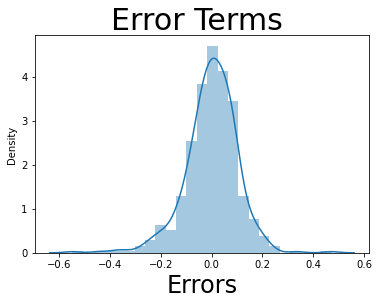

In [252]:
# Assumption of Normality
# Errors term Histogram
fig = plt.figure()
sns.distplot((res), bins = 25)
fig.suptitle('Error Terms', fontsize = 30)  
plt.xlabel('Errors', fontsize = 24)     

In [255]:
X_train_rfe14.shape 

(510, 13)

In [256]:
res.shape

(510,)

In [257]:
#Now scalling Test data on model

NumVar=['atemp','hum','windspeed','cnt']
df_test[NumVar] = scaler.fit_transform(df_test[NumVar])

In [258]:
# x and y test sets creation

y_test = df_test.pop('cnt')
X_test = df_test

In [259]:
X_train_new=X_train_rfe14.drop(['const'], axis=1)

## We are good to use model for prediction

In [260]:
# X_test_new dataframe with variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [261]:
# Now making prediction on the newly created data set

y_pred = lm14.predict(X_test_new)

Text(0, 0.5, 'y_pred')

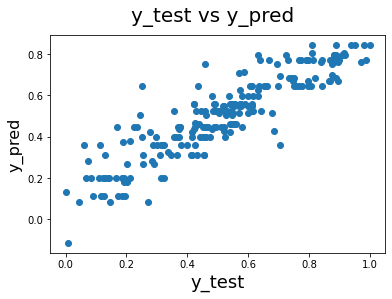

In [262]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)   
plt.ylabel('y_pred', fontsize=16)  

## We can easily see Actual (y_test) and predicted (y_pred) cross each other most of the times, which itself explain the hange in demand.

In [263]:
# Import library for MSE and R square
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [264]:
# Square root of MSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.10767288514704769

In [265]:
#Calculate the r square for test

r2 = r2_score(y_test, y_pred)
r2

0.7955961097986249

R square of our model is 79.5

In [266]:
X_train=X_train_new.iloc[:,0].values

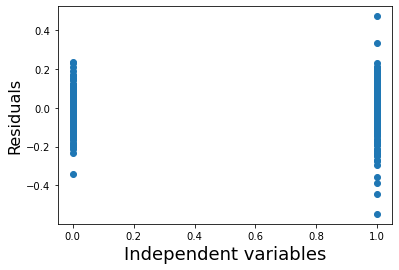

In [267]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_train,res)
fig.suptitle('Independent variables vs Residuals', fontsize=20)  
plt.xlabel('Independent variables', fontsize=18)   
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [268]:
X_train_new.head()

,yr,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,7,10
653,1,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,1,0,1,1,0,0,0,0,0,0
728,1,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [269]:
X_train_rfe14.columns

Index([                             'const',
                                       'yr',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                          7,
                                         10],
      dtype='object')

In [270]:
lm14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     156.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.06e-160
Time:                        21:16:28   Log-Likelihood:                 437.66
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     497   BIC:                            -794.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4000      0.011     35.371      0.000       0.378       0.422
yr                                     0.2470      0.009     26.714      0.000       0.229       0.265
holiday                               -0.0754      0.030     -2.550      0.011      -0.134      -0.017
spring                                -0.1987      0.013    -15.081      0.000      -0.225      -0.173
Light rain_Light snow_Thunderstorm    -0.3154      0.028    -11.255      0.000      -0.371      -0.260
Mist_cloudy                           -0.0887      0.010     -8.924      0.000      -0.108      -0.069
3                                      0.0665      0.017      3.993      0.000       0.034       0.099
5                                      0.1236      0.018      6.685      0.000       0.087       0.160
6                                      0.1485      0.019      7.642      0.000       0.110       0.187
8                                      0.1564      0.018      8.877      0.000       0.122       0.191
9                                      0.1958      0.019     10.451      0.000       0.159       0.233
7                                      0.1254      0.019      6.519      0.000       0.088       0.163
10                                     0.1135      0.018      6.180      0.000       0.077       0.150
==============================================================================
Omnibus:                       77.183   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.834
Skew:                          -0.650   Prob(JB):                     2.83e-61
Kurtosis:                       6.381   Cond. No.                         8.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Equation for best fitted line can be drawn as below


## cnt= 0.247 X yr - 0.0754 X holiday - 0.198 X Spring - 0.3154 X Light rain_Light snow_Thunderstorm - 0.088 X Mist_Cloudy +0.066 X 3 + 0.123 X 5 +0.148 X 6 +0.156 X 8 + 0.195 X 9  + 0.125 X 7 + 0.113 X 10



# Demand for bikes depends mainly on below variables:
yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,5 ,6, 8, 9, 7, 10

Demands increases in the month of 3, 5, 6, 8 ,9, 7 , 10 and yr
Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy

Recomendation for the company:
High demand month of 3, 5 , 6, 8, 9 ,7 and 10